In [1]:
library(dplyr)
Zpal_Nip_TE_data <- read.csv("Zpal_Nip_TE_data.txt", sep = "\t",row.names = NULL) %>% mutate(identity = ifelse(is.na(identity), ltr_identity, identity))
Zpal_Nip_TE_data 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Species,Chr,chr_length,CE_start,CE_end,TE_start,TE_end,type,classification,identity,ltr_identity
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
Nip,Chr01,43929697,16610000,17720000,5535,5644,helitron,DNAnona/Helitron,0.824,NA
Nip,Chr01,43929697,16610000,17720000,6699,6874,terminal_inverted_repeat_element,DNAnona/unknown,0.923,NA
Nip,Chr01,43929697,16610000,17720000,6942,7323,PIF_Harbinger_TIR_transposon,DNAnona/Tourist,0.799,NA
Nip,Chr01,43929697,16610000,17720000,15421,15509,Mutator_TIR_transposon,DNAnona/MULE,0.848,NA
Nip,Chr01,43929697,16610000,17720000,15544,15731,Mutator_TIR_transposon,DNAnona/MULE,0.758,NA
Nip,Chr01,43929697,16610000,17720000,23195,23326,LINE_element,LINE/unknown,0.795,NA
Nip,Chr01,43929697,16610000,17720000,25656,26780,helitron,DNAnona/Helitron,0.766,NA
Nip,Chr01,43929697,16610000,17720000,26939,27055,Gypsy_LTR_retrotransposon,LTR/Gypsy,0.824,NA
Nip,Chr01,43929697,16610000,17720000,30008,30165,LTR_retrotransposon,LTR/unknown,0.828,NA


In [2]:
# 加载 dplyr 和 ggplot2 包
library(dplyr)
library(ggplot2)

# 定义 flanking size 为 1M (1e6)
flanking_size <- 1e6

# 创建一个新的列来存储区域信息，统一区域命名
df <- Zpal_Nip_TE_data %>%
  mutate(region = case_when(
    TE_start >= CE_start & TE_end <= CE_end ~ 'CEN',
    (TE_start >= (CE_start - flanking_size) & TE_end <= CE_start) | 
    (TE_start >= CE_end & TE_end <= (CE_end + flanking_size)) ~ 'Peri-CEN',
    TRUE ~ 'Non-(peri)-CEN')) %>%
  mutate(region = factor(region, levels = c('CEN', 'Peri-CEN', 'Non-(peri)-CEN')))  # 固定区域顺序

# 创建全基因组的汇总数据
# 全基因组的处理是将所有行的 `identity` 汇总为一个 "whole_genome" 类别
df_whole_genome <- df %>%
  mutate(region = "Genome-wide")  # 全基因组标记

# 将全基因组数据与原始区域数据结合  相当于乘以双倍
df_with_genome <- bind_rows(df, df_whole_genome)

# 过滤数据，只保留 classification 中包含 "LTR" 的行，且排除 "TRIM"
filtered_df <- df_with_genome %>%
  filter(grepl("LTR", classification)) %>%
  filter(!grepl("TRIM", classification)) %>%
  filter(!grepl("Solo",classification))

# 把全基因组加入 region 中作为新的类别
filtered_df$region <- factor(filtered_df$region, levels = c('CEN', 'Peri-CEN', 'Non-(peri)-CEN', 'Genome-wide'))

# 检查生成的 filtered_df 数据框
filtered_df

Species,Chr,chr_length,CE_start,CE_end,TE_start,TE_end,type,classification,identity,ltr_identity,region
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<fct>
Nip,Chr01,43929697,16610000,17720000,26939,27055,Gypsy_LTR_retrotransposon,LTR/Gypsy,0.8240,NA,Non-(peri)-CEN
Nip,Chr01,43929697,16610000,17720000,30008,30165,LTR_retrotransposon,LTR/unknown,0.8280,NA,Non-(peri)-CEN
Nip,Chr01,43929697,16610000,17720000,33119,33382,LTR_retrotransposon,LTR/unknown,0.9000,NA,Non-(peri)-CEN
Nip,Chr01,43929697,16610000,17720000,33682,33956,Gypsy_LTR_retrotransposon,LTR/Gypsy,0.8940,NA,Non-(peri)-CEN
Nip,Chr01,43929697,16610000,17720000,38924,39160,Copia_LTR_retrotransposon,LTR/Copia,0.9410,NA,Non-(peri)-CEN
Nip,Chr01,43929697,16610000,17720000,39654,39878,Copia_LTR_retrotransposon,LTR/Copia,0.8240,NA,Non-(peri)-CEN
Nip,Chr01,43929697,16610000,17720000,47577,47994,Gypsy_LTR_retrotransposon,LTR/Gypsy,0.8430,NA,Non-(peri)-CEN
Nip,Chr01,43929697,16610000,17720000,47995,57332,Gypsy_LTR_retrotransposon,LTR/Gypsy,0.8760,NA,Non-(peri)-CEN
Nip,Chr01,43929697,16610000,17720000,53938,58420,Gypsy_LTR_retrotransposon,LTR/Gypsy,0.8220,NA,Non-(peri)-CEN


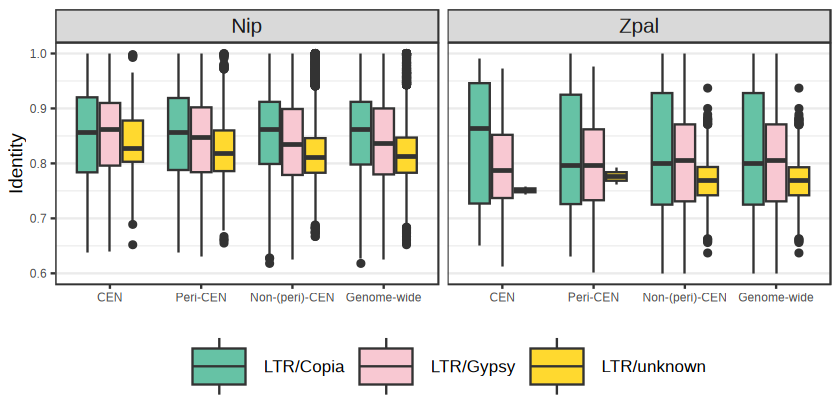

In [3]:
library(ggplot2)

# 设置绘图宽高
options(repr.plot.width = 7, repr.plot.height = 3.5)  # 拉长图形

# 绘制盒须图，并根据物种进行分面
LTR_p <- ggplot(filtered_df, aes(x = region, y = identity, fill = classification)) +
  geom_boxplot() +
  theme_bw() +
  labs(x = NULL, y = "Identity") +
  scale_fill_manual(values = c("LTR/Gypsy" = "#f8c8d2", "LTR/Copia" = "#66c2a5", 
                               "LTR/Solo" = "#8da0cb", "LTR/TRIM" = "#e78ac3", 
                               "LTR/unknown" = "#ffd92f")) +
  theme(
    legend.position = "bottom",              
    legend.background = element_blank(),     # 去掉图例背景
    axis.text.x = element_text(size = 7),   # 调大横坐标字体大小
    axis.text.y = element_text(size = 7),   # 调大纵坐标字体大小
    plot.title = element_blank(),            # 去掉图标题
    legend.text = element_text(size = 10),   # 调整图例文字大小
    legend.key.size = unit(1.5, "cm"),       # 调整图例符号的大小
    panel.grid.major.x = element_blank(),    # 去掉主要竖向网格线
    panel.grid.minor.x = element_blank(),    # 去掉次要竖向网格线
    strip.text = element_text(size = 12),     # 调大分面标题字体大小
    element_text(family = "Times New Roman")
  ) +
  guides(fill = guide_legend(title = NULL)) +  # 去掉图例的标题
  facet_wrap(~ Species)  # 根据 Species 进行分面绘图
LTR_p

ggsave("./plots/Zpal_Nip_LTR.svg",LTR_p ,width=7,height=3.5,units = "in",device = "svg")
  

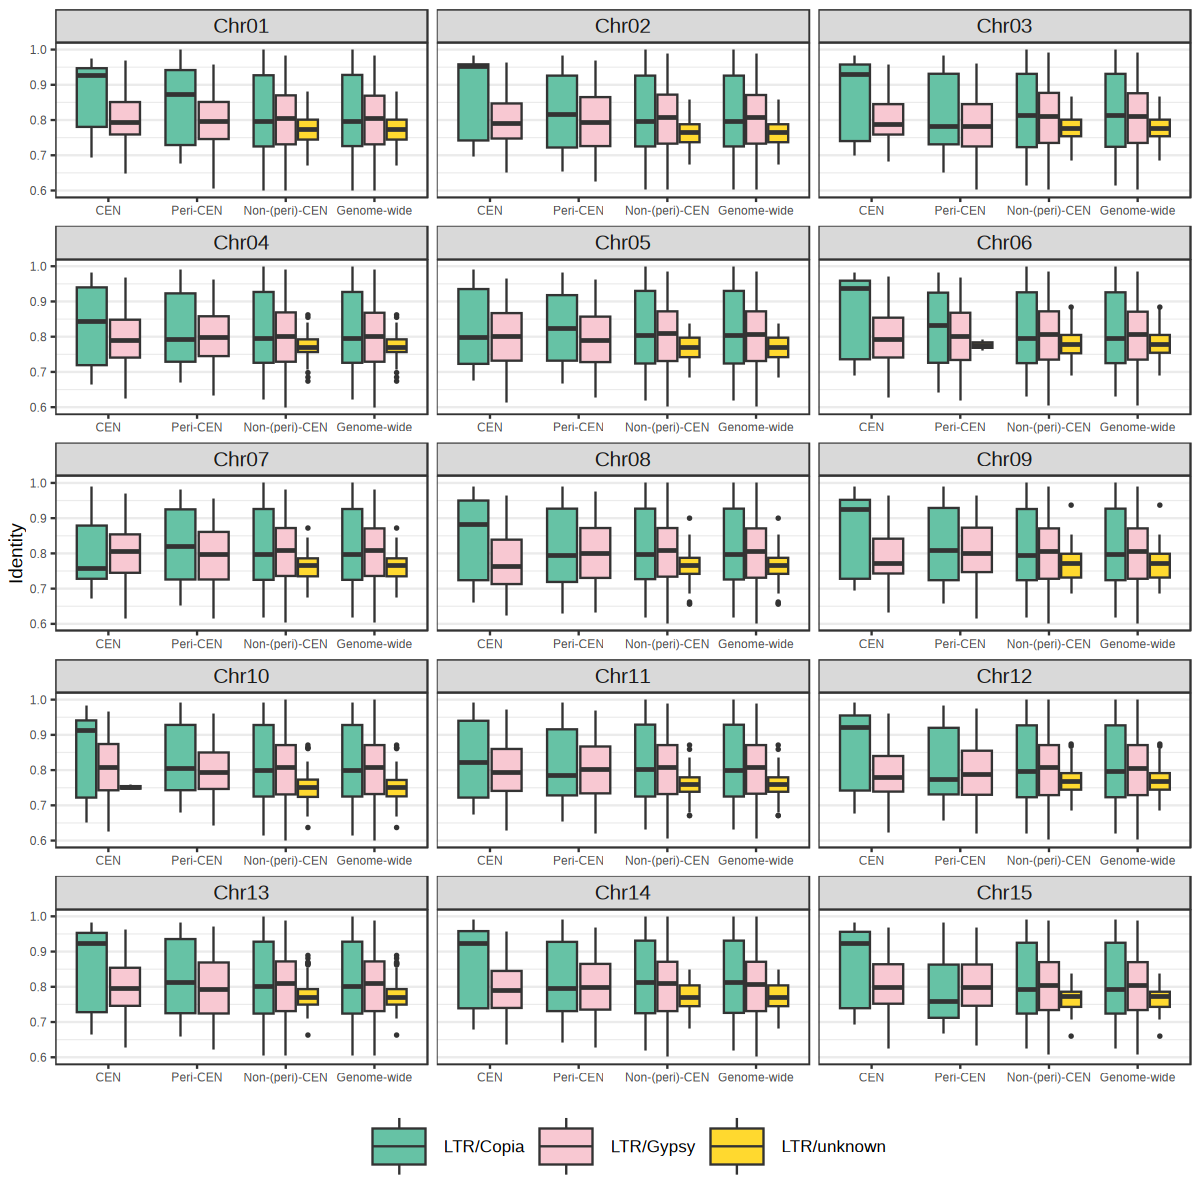

In [7]:
# 加载必要的库
library(ggplot2)
library(dplyr)

# 1. 筛选 Species 为 "Zpal" 的数据
filtered_zpal_df <- filtered_df %>% filter(Species == "Zpal")

# 2. 设置绘图宽高
options(repr.plot.width = 10, repr.plot.height =10)  # 设置图形的宽和高

# 3. 绘制盒须图，展示每条染色体的 identity 分布
chr_LTR_p <- ggplot(filtered_zpal_df, aes(x = region, y = identity, fill = classification)) +
  geom_boxplot(outlier.size = 0.5) +  # 绘制盒须图，并设置离群点大小
  theme_bw() +  # 设置主题
  labs(x = NULL, y = "Identity") +  # 设置标签
  scale_fill_manual(values = c("LTR/Gypsy" = "#f8c8d2", 
                               "LTR/Copia" = "#66c2a5", 
                               "LTR/Solo" = "#8da0cb", 
                               "LTR/TRIM" = "#e78ac3", 
                               "LTR/unknown" = "#ffd92f")) +  # 自定义颜色
  theme(
    legend.position = "bottom",               # 设置图例在底部
    legend.background = element_blank(),      # 去掉图例背景
    axis.text.x = element_text(size = 7),     # 设置横坐标字体大小
    axis.text.y = element_text(size = 7),     # 设置纵坐标字体大小
    plot.title = element_blank(),             # 去掉标题
    legend.text = element_text(size = 10),    # 设置图例字体大小
    legend.key.size = unit(1.5, "cm"),        # 设置图例符号大小
    panel.grid.major.x = element_blank(),     # 去掉主要竖向网格线
    panel.grid.minor.x = element_blank(),     # 去掉次要竖向网格线
    strip.text = element_text(size = 12),     # 设置分面标题字体大小
    element_text(family = "Times New Roman")  # 设置字体
  ) +
  guides(fill = guide_legend(title = NULL)) +  # 去掉图例标题
  facet_wrap(~ Chr, scales = "free_x", ncol = 3)  # 根据染色体分面绘制，每行3个图

# 4. 显示图形
print(chr_LTR_p)

# 5. 保存图形到文件
ggsave("./plots/Zpal_Nip_Identity_Distribution_by_Chromosome.svg", chr_LTR_p, width = 10, height = 10, units = "in", device = "svg")

In [13]:
Zpal_Nip_TE <- Zpal_Nip_TE_data %>% mutate(TE_length=TE_end-TE_start,CE_length=CE_end-CE_start)
Zpal_Nip_TE

Species,Chr,chr_length,CE_start,CE_end,TE_start,TE_end,type,classification,identity,ltr_identity,TE_length,CE_length
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>
Nip,Chr01,43929697,16610000,17720000,5535,5644,helitron,DNAnona/Helitron,0.824,NA,109,1110000
Nip,Chr01,43929697,16610000,17720000,6699,6874,terminal_inverted_repeat_element,DNAnona/unknown,0.923,NA,175,1110000
Nip,Chr01,43929697,16610000,17720000,6942,7323,PIF_Harbinger_TIR_transposon,DNAnona/Tourist,0.799,NA,381,1110000
Nip,Chr01,43929697,16610000,17720000,15421,15509,Mutator_TIR_transposon,DNAnona/MULE,0.848,NA,88,1110000
Nip,Chr01,43929697,16610000,17720000,15544,15731,Mutator_TIR_transposon,DNAnona/MULE,0.758,NA,187,1110000
Nip,Chr01,43929697,16610000,17720000,23195,23326,LINE_element,LINE/unknown,0.795,NA,131,1110000
Nip,Chr01,43929697,16610000,17720000,25656,26780,helitron,DNAnona/Helitron,0.766,NA,1124,1110000
Nip,Chr01,43929697,16610000,17720000,26939,27055,Gypsy_LTR_retrotransposon,LTR/Gypsy,0.824,NA,116,1110000
Nip,Chr01,43929697,16610000,17720000,30008,30165,LTR_retrotransposon,LTR/unknown,0.828,NA,157,1110000


`summarise()` has grouped output by 'Species', 'Chr', 'chr_length'. You can
override using the `.groups` argument.
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


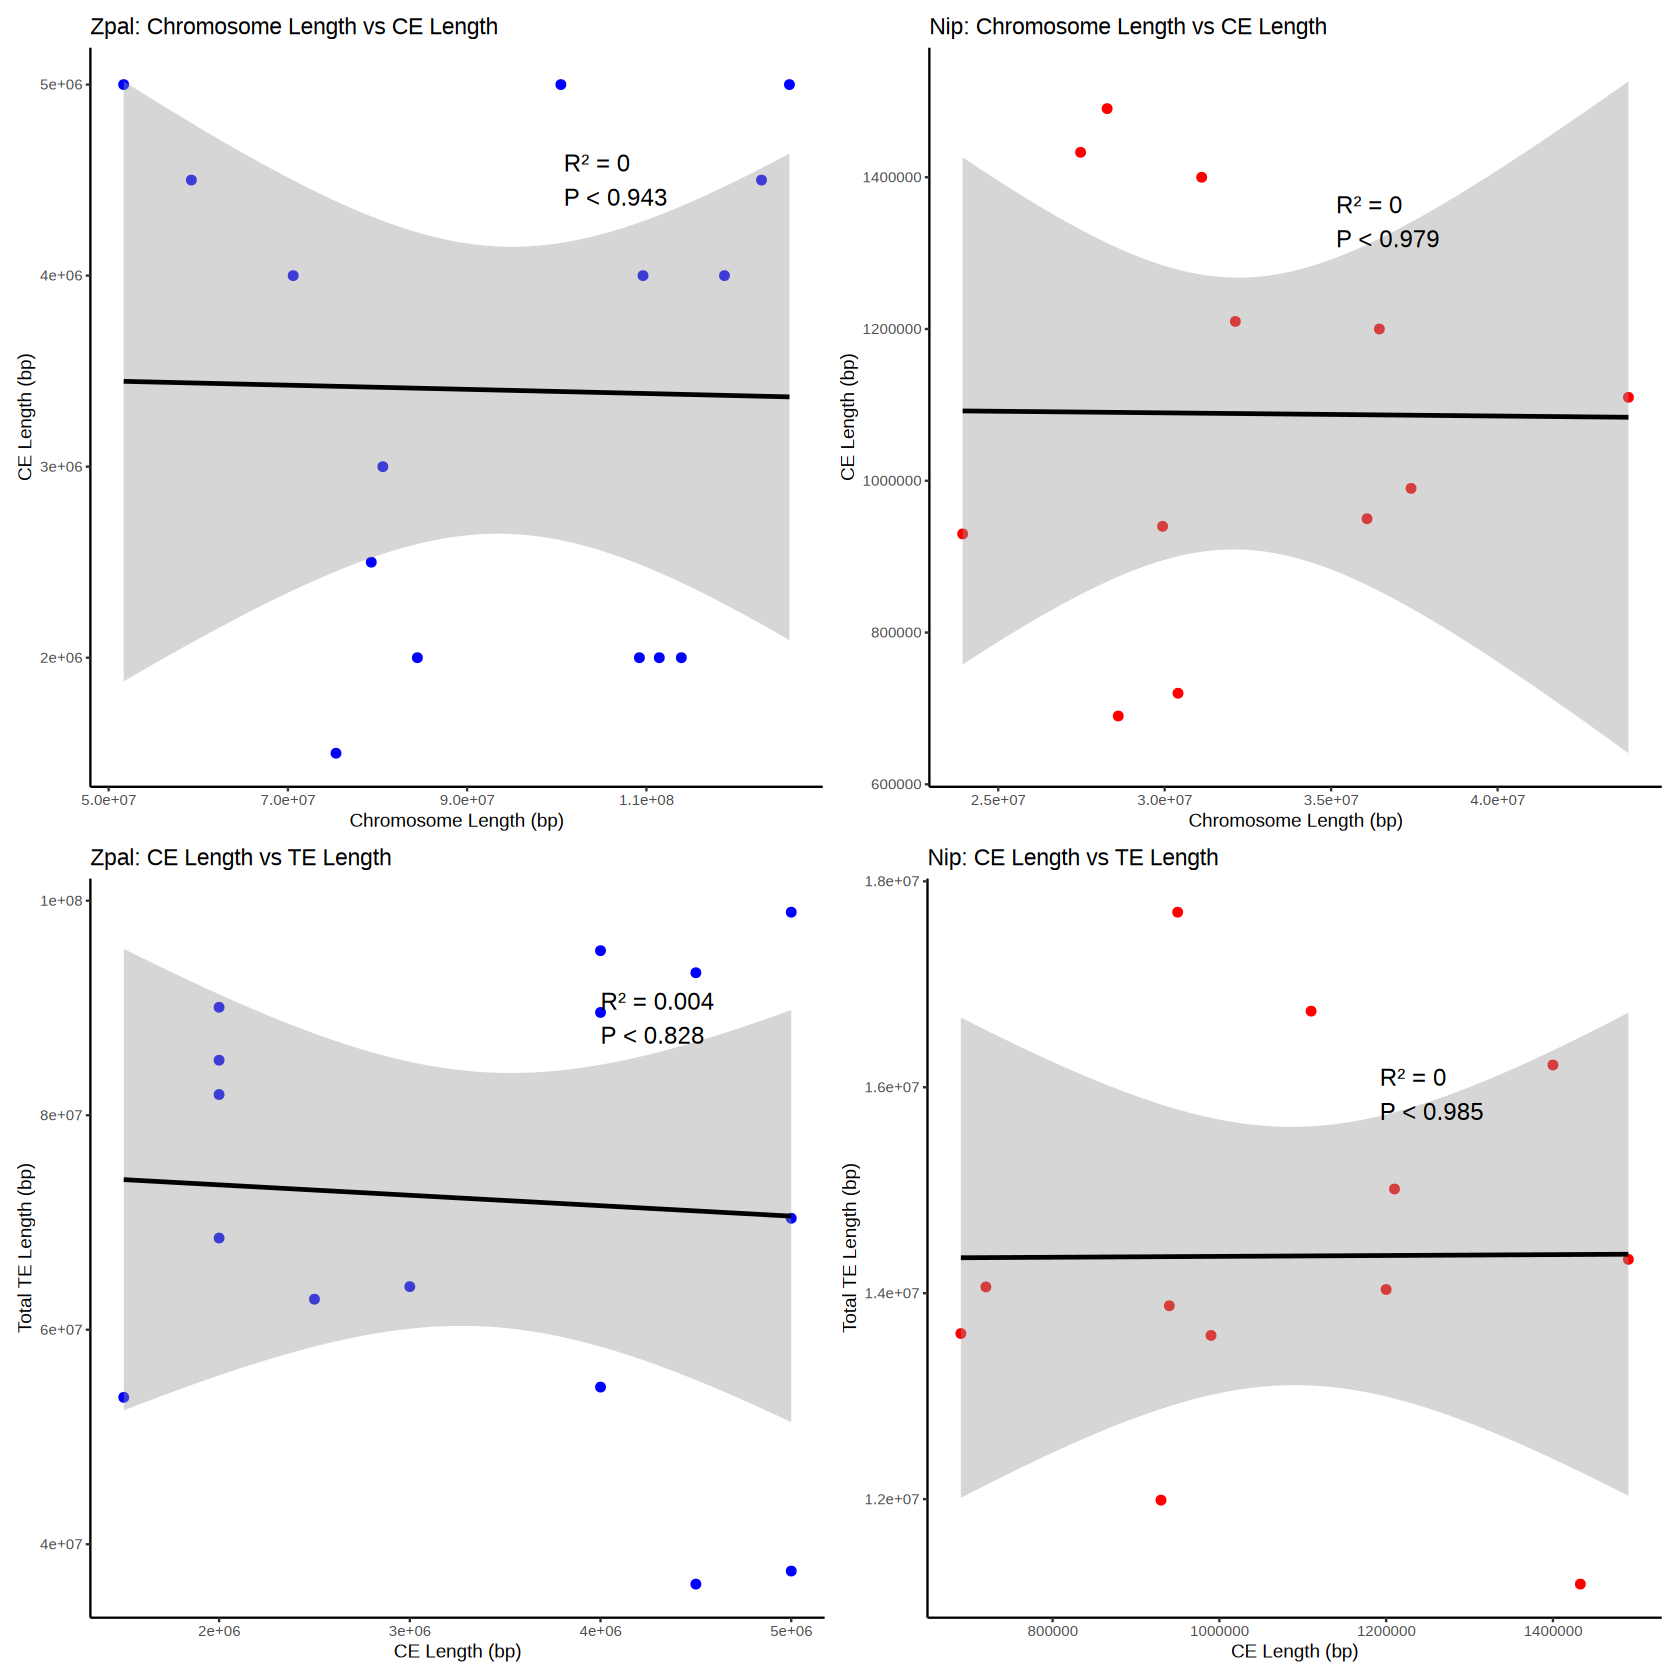

In [14]:
# 加载所需库
options(repr.plot.width=14, repr.plot.height=14)

library(ggplot2)
library(dplyr)
library(patchwork)  # 用于拼接图形

# Step 1: 计算每个物种的TE_length, CE_length 和 chr_length的总和
Zpal_Nip_TE_summary <- Zpal_Nip_TE %>%
  group_by(Species, Chr, chr_length, CE_length) %>%
  summarise(total_TE_length = sum(TE_length))

### 绘制关系图：chr_length vs CE_length 和 CE_length vs TE_length
# -------------------------------------------
# 1. chr_length 和 CE_length 关系图

# Zpal物种，先按 chr_length 升序排列
Zpal_summary <- Zpal_Nip_TE_summary %>%
  filter(Species == "Zpal") %>%
  arrange(chr_length)  # 按照 chr_length 升序排列

Zpal_model_chr_ce <- lm(CE_length ~ chr_length, data = Zpal_summary)
Zpal_r_squared_chr_ce <- round(summary(Zpal_model_chr_ce)$r.squared, 3)
Zpal_p_value_chr_ce <- format.pval(summary(Zpal_model_chr_ce)$coefficients[2, 4], digits = 3, eps = 0.001)

Zpal_plot_chr_ce <- ggplot(Zpal_summary, aes(x = chr_length, y = CE_length)) +
  geom_point(color = "blue", size = 2) +
  geom_smooth(method = "lm", se = TRUE, color = "black", linetype = "solid") +
  ggtitle("Zpal: Chromosome Length vs CE Length") +
  xlab("Chromosome Length (bp)") +
  ylab("CE Length (bp)") +
  annotate("text", x = max(Zpal_summary$chr_length) * 0.8, 
           y = max(Zpal_summary$CE_length) * 0.9, 
           label = paste("R² =", Zpal_r_squared_chr_ce, "\nP <", Zpal_p_value_chr_ce), 
           size = 5, color = "black", hjust = 0) +
  theme_classic()

# Nip物种，先按 chr_length 升序排列
Nip_summary <- Zpal_Nip_TE_summary %>%
  filter(Species == "Nip") %>%
  arrange(chr_length)  # 按照 chr_length 升序排列

Nip_model_chr_ce <- lm(CE_length ~ chr_length, data = Nip_summary)
Nip_r_squared_chr_ce <- round(summary(Nip_model_chr_ce)$r.squared, 3)
Nip_p_value_chr_ce <- format.pval(summary(Nip_model_chr_ce)$coefficients[2, 4], digits = 3, eps = 0.001)

Nip_plot_chr_ce <- ggplot(Nip_summary, aes(x = chr_length, y = CE_length)) +
  geom_point(color = "red", size = 2) +
  geom_smooth(method = "lm", se = TRUE, color = "black", linetype = "solid") +
  ggtitle("Nip: Chromosome Length vs CE Length") +
  xlab("Chromosome Length (bp)") +
  ylab("CE Length (bp)") +
  annotate("text", x = max(Nip_summary$chr_length) * 0.8, 
           y = max(Nip_summary$CE_length) * 0.9, 
           label = paste("R² =", Nip_r_squared_chr_ce, "\nP <", Nip_p_value_chr_ce), 
           size = 5, color = "black", hjust = 0) +
  theme_classic()

# -------------------------------------------
# 2. CE_length 和 TE_length 关系图

# Zpal物种，先按 CE_length 升序排列
Zpal_summary <- Zpal_summary %>%
  arrange(CE_length)  # 按照 CE_length 升序排列

Zpal_model_ce_te <- lm(total_TE_length ~ CE_length, data = Zpal_summary)
Zpal_r_squared_ce_te <- round(summary(Zpal_model_ce_te)$r.squared, 3)
Zpal_p_value_ce_te <- format.pval(summary(Zpal_model_ce_te)$coefficients[2, 4], digits = 3, eps = 0.001)

Zpal_plot_ce_te <- ggplot(Zpal_summary, aes(x = CE_length, y = total_TE_length)) +
  geom_point(color = "blue", size = 2) +
  geom_smooth(method = "lm", se = TRUE, color = "black", linetype = "solid") +
  ggtitle("Zpal: CE Length vs TE Length") +
  xlab("CE Length (bp)") +
  ylab("Total TE Length (bp)") +
  annotate("text", x = max(Zpal_summary$CE_length) * 0.8, 
           y = max(Zpal_summary$total_TE_length) * 0.9, 
           label = paste("R² =", Zpal_r_squared_ce_te, "\nP <", Zpal_p_value_ce_te), 
           size = 5, color = "black", hjust = 0) +
  theme_classic()

# Nip物种，先按 CE_length 升序排列
Nip_summary <- Nip_summary %>%
  arrange(CE_length)  # 按照 CE_length 升序排列

Nip_model_ce_te <- lm(total_TE_length ~ CE_length, data = Nip_summary)
Nip_r_squared_ce_te <- round(summary(Nip_model_ce_te)$r.squared, 3)
Nip_p_value_ce_te <- format.pval(summary(Nip_model_ce_te)$coefficients[2, 4], digits = 3, eps = 0.001)

Nip_plot_ce_te <- ggplot(Nip_summary, aes(x = CE_length, y = total_TE_length)) +
  geom_point(color = "red", size = 2) +
  geom_smooth(method = "lm", se = TRUE, color = "black", linetype = "solid") +
  ggtitle("Nip: CE Length vs TE Length") +
  xlab("CE Length (bp)") +
  ylab("Total TE Length (bp)") +
  annotate("text", x = max(Nip_summary$CE_length) * 0.8, 
           y = max(Nip_summary$total_TE_length) * 0.9, 
           label = paste("R² =", Nip_r_squared_ce_te, "\nP <", Nip_p_value_ce_te), 
           size = 5, color = "black", hjust = 0) +
  theme_classic()

# Step 3: 使用 patchwork 组合所有图形
(Zpal_plot_chr_ce + Nip_plot_chr_ce) / (Zpal_plot_ce_te + Nip_plot_ce_te)

`summarise()` has grouped output by 'Chr'. You can override using the `.groups`
argument.
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


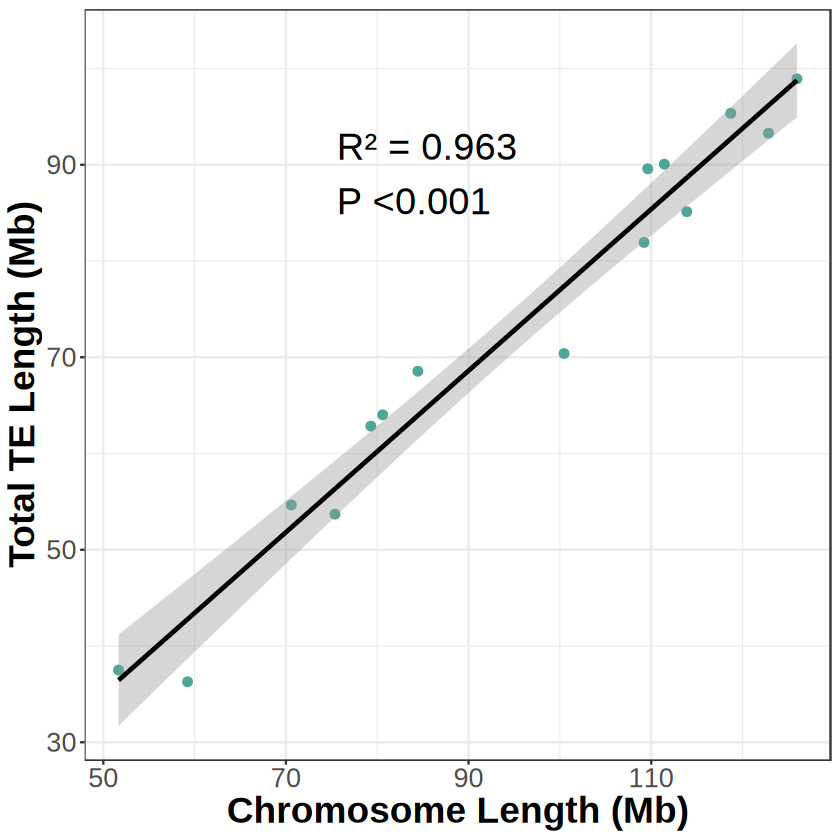

In [27]:
# 加载所需库
options(repr.plot.width = 7, repr.plot.height = 7)

library(ggplot2)
library(dplyr)

# Step 1: 根据每条染色体计算 TE_length 的总和，并将单位从 bp 转换为 Mb
Zpal_TE_summary <- Zpal_Nip_TE %>%
  filter(Species == "Zpal") %>%
  group_by(Chr, chr_length) %>%
  summarise(total_TE_length = sum(TE_length)) %>%
  mutate(chr_length_Mb = chr_length / 1e6,     # 转换为 Mb
         total_TE_length_Mb = total_TE_length / 1e6)  # 转换为 Mb

# Step 2: 创建线性回归模型，基于 Mb 单位
model <- lm(total_TE_length_Mb ~ chr_length_Mb, data = Zpal_TE_summary)

# Step 3: 提取 R² 和 p 值
summary_model <- summary(model)
r_squared <- round(summary_model$r.squared, 3)
p_value <- format.pval(summary_model$coefficients[2, 4], digits = 3, eps = 0.001)  # 格式化 p 值

# Step 4: 绘制回归曲线，并显示 R² 和 p 值
p <- ggplot(Zpal_TE_summary, aes(x = chr_length_Mb, y = total_TE_length_Mb)) +
  geom_point(color = "#4EA699FF", size = 2) +  # 绘制数据点
  geom_smooth(method = "lm", se = TRUE, color = "black", linetype = "solid") +  # 绘制回归线
  xlab("Chromosome Length (Mb)") +
  ylab("Total TE Length (Mb)") +
  # 调整 R² 和 p 值的位置，更靠左
  annotate("text", x = max(Zpal_TE_summary$chr_length_Mb) *0.6 ,  # 修改位置，靠左
           y = max(Zpal_TE_summary$total_TE_length_Mb) * 0.9, 
           label = paste("R² =", r_squared, "\nP", p_value), 
           size =8, color = "black", hjust = 0) +  # 显示 R² 和 p 值
  theme_bw() +  # 使用网格背景
  theme(
    text = element_text(size = 14),  # 调整整体字体大小
    axis.title.x = element_text(size = 22, face = "bold"),  # 加大并加粗 X 轴标签
    axis.title.y = element_text(size = 22, face = "bold"),  # 加大并加粗 Y 轴标签
    axis.text = element_text(size = 16)  # 调整坐标轴数字的大小
  )
p

# 使用 ggsave 简化导出 SVG 文件

ggsave("./plots/TE_to_Chr_length_plot.svg", plot = p, width = 7, height = 7, units = "in", device = "svg")